In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Titanic_Train=pd.read_csv("D:\\ML Data\\Titanic_train.csv")
Titanic_Test=pd.read_csv("D:\\ML Data\\Titanic_test.csv")

In [3]:
Titanic_Train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
y=pd.DataFrame(Titanic_Train['Survived'],columns=['Survived'])

In [5]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [6]:
Titanic_Train.shape

(891, 12)

In [7]:
Titanic_Train.drop(['Survived'],axis=1, inplace=True)

In [8]:
all_data=pd.concat([Titanic_Train,Titanic_Test],ignore_index=True)

In [9]:
all_data.shape

(1309, 11)

In [10]:
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
import seaborn as sb

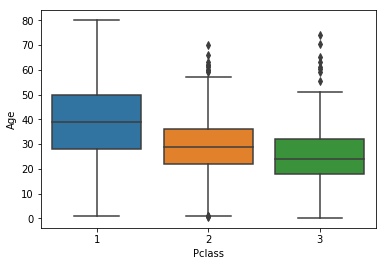

In [12]:
sb.boxplot(x='Pclass', y='Age', data=all_data)

In [13]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1] 
    if pd.isnull(Age): 
        if Pclass==1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
    else:
        return Age

In [14]:
all_data['Age']=all_data[['Age','Pclass']].apply(age_approx,axis=1)

In [15]:
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [16]:
all_data['Embarked']=all_data['Embarked'].fillna(all_data['Embarked'].mode()[0])
all_data['Fare']=all_data['Fare'].fillna(all_data['Fare'].mode()[0])

In [17]:
all_data.drop(['Cabin'],axis=1,inplace=True)

In [18]:
all_data = all_data.drop('PassengerId',axis=1)
all_data = all_data.drop('Ticket',axis=1)
all_data = all_data.drop('Name',axis=1)

In [19]:
gender=pd.get_dummies(all_data['Sex'])

In [20]:
Embarked=pd.get_dummies(all_data['Embarked'])

In [21]:
all_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,24.0,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [22]:
all_data = all_data.drop('Sex',axis=1)
all_data = all_data.drop('Embarked',axis=1)

In [23]:
all_data

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
5,3,24.0,0,0,8.4583
6,1,54.0,0,0,51.8625
7,3,2.0,3,1,21.0750
8,3,27.0,0,2,11.1333
9,2,14.0,1,0,30.0708


In [24]:
all_data_dummy=pd.concat([all_data,gender,Embarked],axis=1)

In [25]:
all_data_dummy

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
5,3,24.0,0,0,8.4583,0,1,0,1,0
6,1,54.0,0,0,51.8625,0,1,0,0,1
7,3,2.0,3,1,21.0750,0,1,0,0,1
8,3,27.0,0,2,11.1333,1,0,0,0,1
9,2,14.0,1,0,30.0708,1,0,1,0,0


In [26]:
ntrain=Titanic_Train.shape[0]
Titanic_Train=all_data_dummy.iloc[:ntrain,:]
Titanic_Test=all_data_dummy.iloc[ntrain:,:]
print(Titanic_Train.shape, Titanic_Test.shape)

(891, 10) (418, 10)


In [27]:
X=np.matrix(Titanic_Train)
Y=np.matrix(y)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
lr=LogisticRegression()

In [31]:
lr.fit(X,np.array(y).ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
score0=cross_val_score(lr,X,np.array(y).ravel(),cv=10,scoring='accuracy')

In [33]:
score0

array([0.77777778, 0.78888889, 0.7752809 , 0.83146067, 0.78651685,
       0.7752809 , 0.78651685, 0.78651685, 0.83146067, 0.81818182])

In [34]:
lr.score(X,y)

0.8047138047138047

In [35]:
pred=lr.predict(Titanic_Test)

In [36]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [37]:
len(pred)

418

In [38]:
pred=pd.DataFrame(pred)
sub_data=pd.read_csv('D:\\ML Data\\gender_submission.csv')
datasets=pd.concat([sub_data['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('D:\\ML Data\\gender_submission_final1.csv',index=False)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier(n_neighbors=1)

In [41]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [42]:
knn.fit(X,np.array(y).ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [43]:
score1=cross_val_score(knn,X,np.array(y).ravel(),cv=10,scoring='accuracy')

In [44]:
score1

array([0.67777778, 0.67777778, 0.70786517, 0.69662921, 0.71910112,
       0.70786517, 0.74157303, 0.70786517, 0.6741573 , 0.76136364])

In [45]:
knn.score(X,y)

0.9809203142536476

In [46]:
pred_1=knn.predict(Titanic_Test)

In [47]:
pred_1

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [48]:
len(pred_1)

418

In [49]:
pred_1=pd.DataFrame(pred_1)
sub_data=pd.read_csv('D:\\ML Data\\gender_submission.csv')
datasets=pd.concat([sub_data['PassengerId'],pred_1],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('D:\\ML Data\\gender_submission_final2.csv',index=False)

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
gnb=GaussianNB()

In [52]:
gnb

GaussianNB(priors=None)

In [53]:
gnb.fit(X,np.array(y).ravel())

GaussianNB(priors=None)

In [54]:
score2=cross_val_score(gnb,X,np.array(y).ravel(),cv=10,scoring='accuracy')

In [55]:
score2

array([0.76666667, 0.75555556, 0.78651685, 0.82022472, 0.79775281,
       0.76404494, 0.78651685, 0.79775281, 0.78651685, 0.79545455])

In [56]:
gnb.score(X,y)

0.7901234567901234

In [57]:
pred_2=gnb.predict(Titanic_Test)

In [58]:
pred_2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
len(pred_2)

418

In [60]:
pred_2=pd.DataFrame(pred_2)
sub_data=pd.read_csv('D:\\ML Data\\gender_submission.csv')
datasets=pd.concat([sub_data['PassengerId'],pred_2],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('D:\\ML Data\\gender_submission_final3.csv',index=False)

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
mnb=MultinomialNB()

In [63]:
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
mnb.fit(X,np.array(y).ravel())

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
score3=cross_val_score(mnb,X,np.array(y).ravel(),cv=10,scoring='accuracy')

In [66]:
score3

array([0.57777778, 0.58888889, 0.68539326, 0.7752809 , 0.66292135,
       0.74157303, 0.75280899, 0.70786517, 0.73033708, 0.69318182])

In [67]:
mnb.score(X,y)

0.6902356902356902

In [68]:
pred_3=gnb.predict(Titanic_Test)

In [69]:
pred_3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [70]:
pred_3=pd.DataFrame(pred_3)
sub_data=pd.read_csv('D:\\ML Data\\gender_submission.csv')
datasets=pd.concat([sub_data['PassengerId'],pred_3],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('D:\\ML Data\\gender_submission_final4.csv',index=False)

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
data=DecisionTreeClassifier(criterion ='gini',max_depth=10,max_features=10)

In [73]:
data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
data.fit(X,np.array(y).ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
score4=cross_val_score(data,X,np.array(y).ravel(),cv=10,scoring='accuracy')

In [76]:
score4

array([0.77777778, 0.81111111, 0.73033708, 0.84269663, 0.82022472,
       0.82022472, 0.82022472, 0.78651685, 0.83146067, 0.81818182])

In [77]:
data.score(X,y)

0.9393939393939394

In [78]:
pred_4=gnb.predict(Titanic_Test)

In [79]:
pred_4

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [80]:
pred_4=pd.DataFrame(pred_4)
sub_data=pd.read_csv('D:\\ML Data\\gender_submission.csv')
datasets=pd.concat([sub_data['PassengerId'],pred_4],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('D:\\ML Data\\gender_submission_final5.csv',index=False)

In [81]:
from sklearn.ensemble import BaggingClassifier

In [82]:
bc=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100)

In [83]:
bc

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [84]:
bc.fit(X,np.array(y).ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [ ]:
score5=cross_val_score(bc,X,np.array(y).ravel(),cv=10,scoring='accuracy')

In [ ]:
score5

In [ ]:
bc.score(X,y)

In [ ]:
pred_5=bc.predict(Titanic_Test)

In [ ]:
pred_5

In [ ]:
pred_5=pd.DataFrame(pred_5)
sub_data=pd.read_csv('D:\\ML Data\\gender_submission.csv')
datasets=pd.concat([sub_data['PassengerId'],pred_5],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('D:\\ML Data\\gender_submission_final6.csv',index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=44)

In [ ]:
rf

In [ ]:
rf.fit(X,np.array(y).ravel())

In [ ]:
score6=cross_val_score(bc,X,np.array(y).ravel(),cv=10,scoring='accuracy')

In [ ]:
score6

In [ ]:
rf.score(X,y)

In [ ]:
pred_6=rf.predict(Titanic_Test)

In [ ]:
pred_6

In [ ]:
pred_6=pd.DataFrame(pred_6)
sub_data=pd.read_csv('D:\\ML Data\\gender_submission.csv')
datasets=pd.concat([sub_data['PassengerId'],pred_6],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('D:\\ML Data\\gender_submission_final7.csv',index=False)

In [ ]:
pred_6